<a href="https://colab.research.google.com/github/Esoujanya/Hexart.In---AI-Center/blob/main/cancer_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Cleaning With Python
1.  Importing Libraries
2. Input Customer Feedback Dataset
3.  Locate Missing Data
4.  Check for Duplicates
5. Detect Outliers 
6. Normalize Casing 
reference:https://colab.research.google.com/drive/1BK0C2tOvVC7Jh_BB4IsG7Eq-l2c8TwtE?usp=sharing  for dataset


Importing and reading data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/Data Sets/BRCA.csv")
data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [ ]:
data.shape #the numbers of data rows and columns

(341, 16)

In [ ]:
data.info() #the information of the data :The column names,  count of null values and their data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [ ]:
data.isnull().sum() #The sum of null vale in each column

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [ ]:
data.loc[data.isnull().any(axis=1)] #The location of null values in the dataset

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
7,TCGA-A7-A426,50.0,FEMALE,0.672490,1.27900,-0.321070,-0.112390,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,16-May-17,NaN,NaN
22,TCGA-AN-A0FY,55.0,FEMALE,0.330640,0.84757,-0.494660,0.116560,I,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,07-Nov-17,NaN,NaN
99,TCGA-A8-A06O,60.0,FEMALE,0.532420,1.54110,-1.009500,-0.125880,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,11-Dec-17,NaN,NaN
111,TCGA-MS-A51U,44.0,FEMALE,-0.278840,2.16880,-0.462330,0.272200,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,20-Jan-18,NaN,NaN
170,TCGA-AR-A0U2,47.0,FEMALE,0.515580,2.65020,-0.103130,-0.045725,III,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,29-Jul-18,NaN,Dead
182,TCGA-C8-A1HI,40.0,FEMALE,-1.455300,-0.74177,1.133600,-0.839700,III,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,07-Sep-18,NaN,NaN
189,TCGA-AO-A03O,69.0,FEMALE,-0.757790,-0.33780,0.561410,0.208300,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,07-Oct-18,NaN,Dead
196,TCGA-C8-A12U,46.0,FEMALE,-0.010999,0.86749,0.281570,-0.545880,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,10-Jun-19,NaN,NaN
206,TCGA-E9-A1NH,71.0,FEMALE,0.394090,1.70540,0.035642,1.441000,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,26-Nov-18,NaN,NaN
219,TCGA-C8-A12X,62.0,FEMALE,0.649340,1.81680,0.279260,0.132280,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,20-Jun-19,NaN,NaN


In [ ]:
data=data.loc[:333] #To slice out na/null rows out.

In [ ]:
data

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,09-Feb-20,Dead
330,TCGA-A8-A085,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,01-Nov-19,04-Mar-20,Dead
331,TCGA-A1-A0SG,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead


In [ ]:
data.isna().sum() #to check the remaining null values still present.

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

The null values present are on date of last visit and patient status. As the patient status are not available and cannot be filled randomly, we will drop all null values.

In [ ]:
data.dropna(inplace = True) #To drop all the null values in the  data

In [ ]:
data

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,09-Feb-20,Dead
330,TCGA-A8-A085,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,01-Nov-19,04-Mar-20,Dead
331,TCGA-A1-A0SG,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead


In [ ]:
data.isna().sum() # data has zero null values after dropping all null values

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [ ]:
data.info() #checking the data info to know if there are still null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float

In [ ]:
print(data.duplicated()) #To check for duplicates in the data
data

0      False
1      False
2      False
3      False
4      False
       ...  
329    False
330    False
331    False
332    False
333    False
Length: 317, dtype: bool


,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,09-Feb-20,Dead
330,TCGA-A8-A085,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,01-Nov-19,04-Mar-20,Dead
331,TCGA-A1-A0SG,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead


In [ ]:
data.drop(columns = [ "Date_of_Surgery","Date_of_Last_Visit"], inplace = True)
data #to drop the features that are not needed.

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,Dead
330,TCGA-A8-A085,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,Dead
331,TCGA-A1-A0SG,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
332,TCGA-A2-A0EU,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,Dead


In [ ]:
data.shape #to check the new shape after dropping na/null rows, null values and columns not needed

(317, 14)

**DATA EXPLORATION**

In [ ]:
data.dtypes

Patient_ID         object
Age               float64
Gender             object
Protein1          float64
Protein2          float64
Protein3          float64
Protein4          float64
Tumour_Stage       object
Histology          object
ER status          object
PR status          object
HER2 status        object
Surgery_type       object
Patient_Status     object
dtype: object

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,317.0,58.725552,12.827374,29.00000,49.00000,58.000000,67.00000,90.0000
Protein1,317.0,-0.027232,0.543858,-2.14460,-0.35060,0.005649,0.33626,1.5936
Protein2,317.0,0.949557,0.906153,-0.97873,0.36884,0.997130,1.61200,3.4022
Protein3,317.0,-0.095104,0.589027,-1.62740,-0.53136,-0.193040,0.25121,2.1934
Protein4,317.0,0.006713,0.625965,-2.02550,-0.38224,0.038522,0.43625,1.6299


In [ ]:
data.Gender.describe()

count        317
unique         2
top       FEMALE
freq         313
Name: Gender, dtype: object

-Autopct. string, used to label the wedges with their numeric value
-The explode() function is used to transform each element of a list-like to a row, replicating the index values
-autopct for percentage representation , figsize to adjust the size of circle
-value_counts=Return a Series containing counts of unique values
-The describe() method returns description of the data in the DataFrame

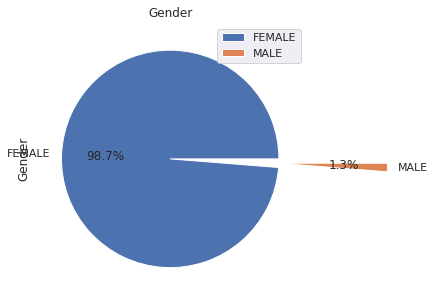

In [ ]:
data.Gender.value_counts().plot(kind='pie',title='Gender',legend=True,autopct='%1.1f%%', explode=[0,1.0],figsize=(5,5))
plt.show()

In [ ]:
data["Tumour_Stage"].describe()

count     317
unique      3
top        II
freq      180
Name: Tumour_Stage, dtype: object

In [ ]:
data["Tumour_Stage"].value_counts()

II     180
III     77
I       60
Name: Tumour_Stage, dtype: int64

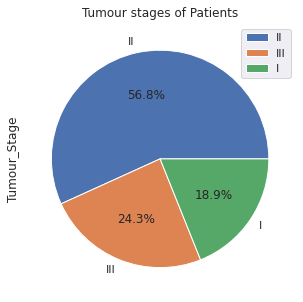

In [ ]:
data['Tumour_Stage'].value_counts().plot(kind='pie',title='Tumour stages of Patients',legend=True,autopct='%1.1f%%',figsize=(5,5))
plt.show()

In [ ]:
data["Histology"].describe()

count                               317
unique                                3
top       Infiltrating Ductal Carcinoma
freq                                224
Name: Histology, dtype: object

In [ ]:
data["Histology"].value_counts()

Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: Histology, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

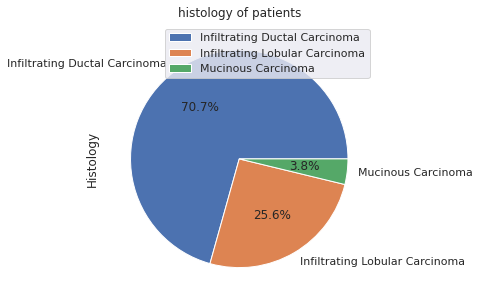

In [ ]:
data["Histology"].value_counts().plot(kind="pie",title="histology of patients",legend=True,figsize=(5,5),autopct="%1.1f%%")
plt.show

In [ ]:
data["ER status"].describe()

count          317
unique           1
top       Positive
freq           317
Name: ER status, dtype: object

In [ ]:
data["ER status"].value_counts()

Positive    317
Name: ER status, dtype: int64

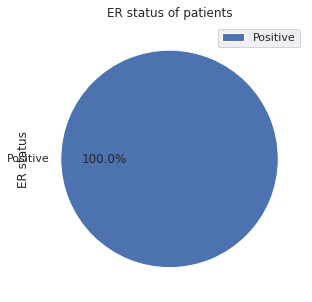

In [ ]:
data["ER status"].value_counts().plot(kind="pie",autopct="%1.1f%%",figsize=(5,5),legend=True,title="ER status of patients")
plt.show()

In [ ]:
data['Tumour_Stage']=data['Tumour_Stage'].map({'I':1,'II':2,'III':3})
data['Histology']=data['Histology'].map({'Infiltrating Ductal Carcinoma':1,'Infiltrating Lobular Carcinoma':2,'Mucinous Carcinoma':3,})
data['ER status']=data['ER status'].map({'Positive':1})
data['PR status']=data['PR status'].map({'Positive':1})
data['HER2 status']=data['HER2 status'].map({'Positive':1,'Negative':2})
data['Gender']=data['Gender'].map({'MALE':1,'FEMALE':2})
data['Surgery_type']=data['Surgery_type'].map({'Other':1,'Modified Radical Mastectomy':2,'Lumpectomy':3,'Simple Mastectomy':4})
data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,2,0.080353,0.42638,0.54715,0.273680,3,1,1,1,2,2,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,2,-0.420320,0.57807,0.61447,-0.031505,2,3,1,1,2,3,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,2,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,2,1,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,2,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,2,2,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,2,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,2,1,06-May-17,27-Jun-19,Dead


**MACHINE LEARNING**

In [ ]:
x=data[["Age","Gender","Protein1","Protein2","Protein3","Protein4","Tumour_Stage","Histology","ER status","PR status","HER2 status","Surgery_type"]]
#independent variable
y=data["Patient_Status"] #dependent Variable
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting data into train and test data
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=42)

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [ ]:
y_predicted=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)

0.828125